# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
PATH ='/content/drive/MyDrive/Colab Notebooks/Datajarlabs/6-Mastering_the_Exploratory_Data_Analysis'
os.chdir(PATH)

In [ ]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [ ]:
for column in df.columns[3:]:
    for year in df['YEAR'].unique():
        df[column].fillna(df[df['YEAR'] == year][column].mean(), inplace=True)

In [ ]:
df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

In [ ]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,8.844779e+05,7.940014e+06,6.470043e+05,3.675878e+06,3.617132e+06,8.038215e+06,4.174329e+06,2.345868e+06,3.779261e+05,7.755828e+05,17059.254869,68624.415263,68990.235660,67779.692643,57899.964546,5.696683e+05,2.706907e+05,9.103738e+05,224.318598,270.522083,216.673632,261.166181
std,9.568621,9.024077e+05,1.032975e+07,1.010029e+06,4.874761e+06,4.806776e+06,1.052905e+07,5.525256e+06,2.950641e+06,4.591536e+05,1.166698e+06,28557.057062,78697.909500,78001.914197,76068.501470,65825.985118,5.211587e+05,2.617084e+05,1.030134e+06,9.963167,8.372126,5.012101,4.135655
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,4.646880e+05,2.992297e+06,2.602770e+05,1.618602e+06,1.162580e+06,3.004448e+06,1.570157e+06,8.996910e+05,1.624780e+05,2.608130e+05,2536.500000,20944.000000,20486.500000,20518.500000,17949.000000,3.158105e+05,1.457900e+05,2.800010e+05,218.418605,266.325581,215.372093,260.000000
50%,2002.000000,8.020543e+05,4.572764e+06,2.970296e+05,2.088314e+06,2.187420e+06,4.653591e+06,2.454000e+06,1.370149e+06,2.482348e+05,4.050078e+05,10091.700000,51920.000000,51999.000000,50447.000000,40774.000000,5.575071e+05,2.517678e+05,6.809780e+05,218.418605,266.325581,215.372093,260.000000
75%,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.079995e+05,8.122720e+05,19689.000000,75726.000000,77052.000000,76719.500000,68023.000000,5.575071e+05,2.528075e+05,1.002840e+06,231.000000,274.000000,217.000000,260.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [ ]:
df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1715,1715
unique,1715,53
top,2017_NEBRASKA,CONNECTICUT
freq,1,33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

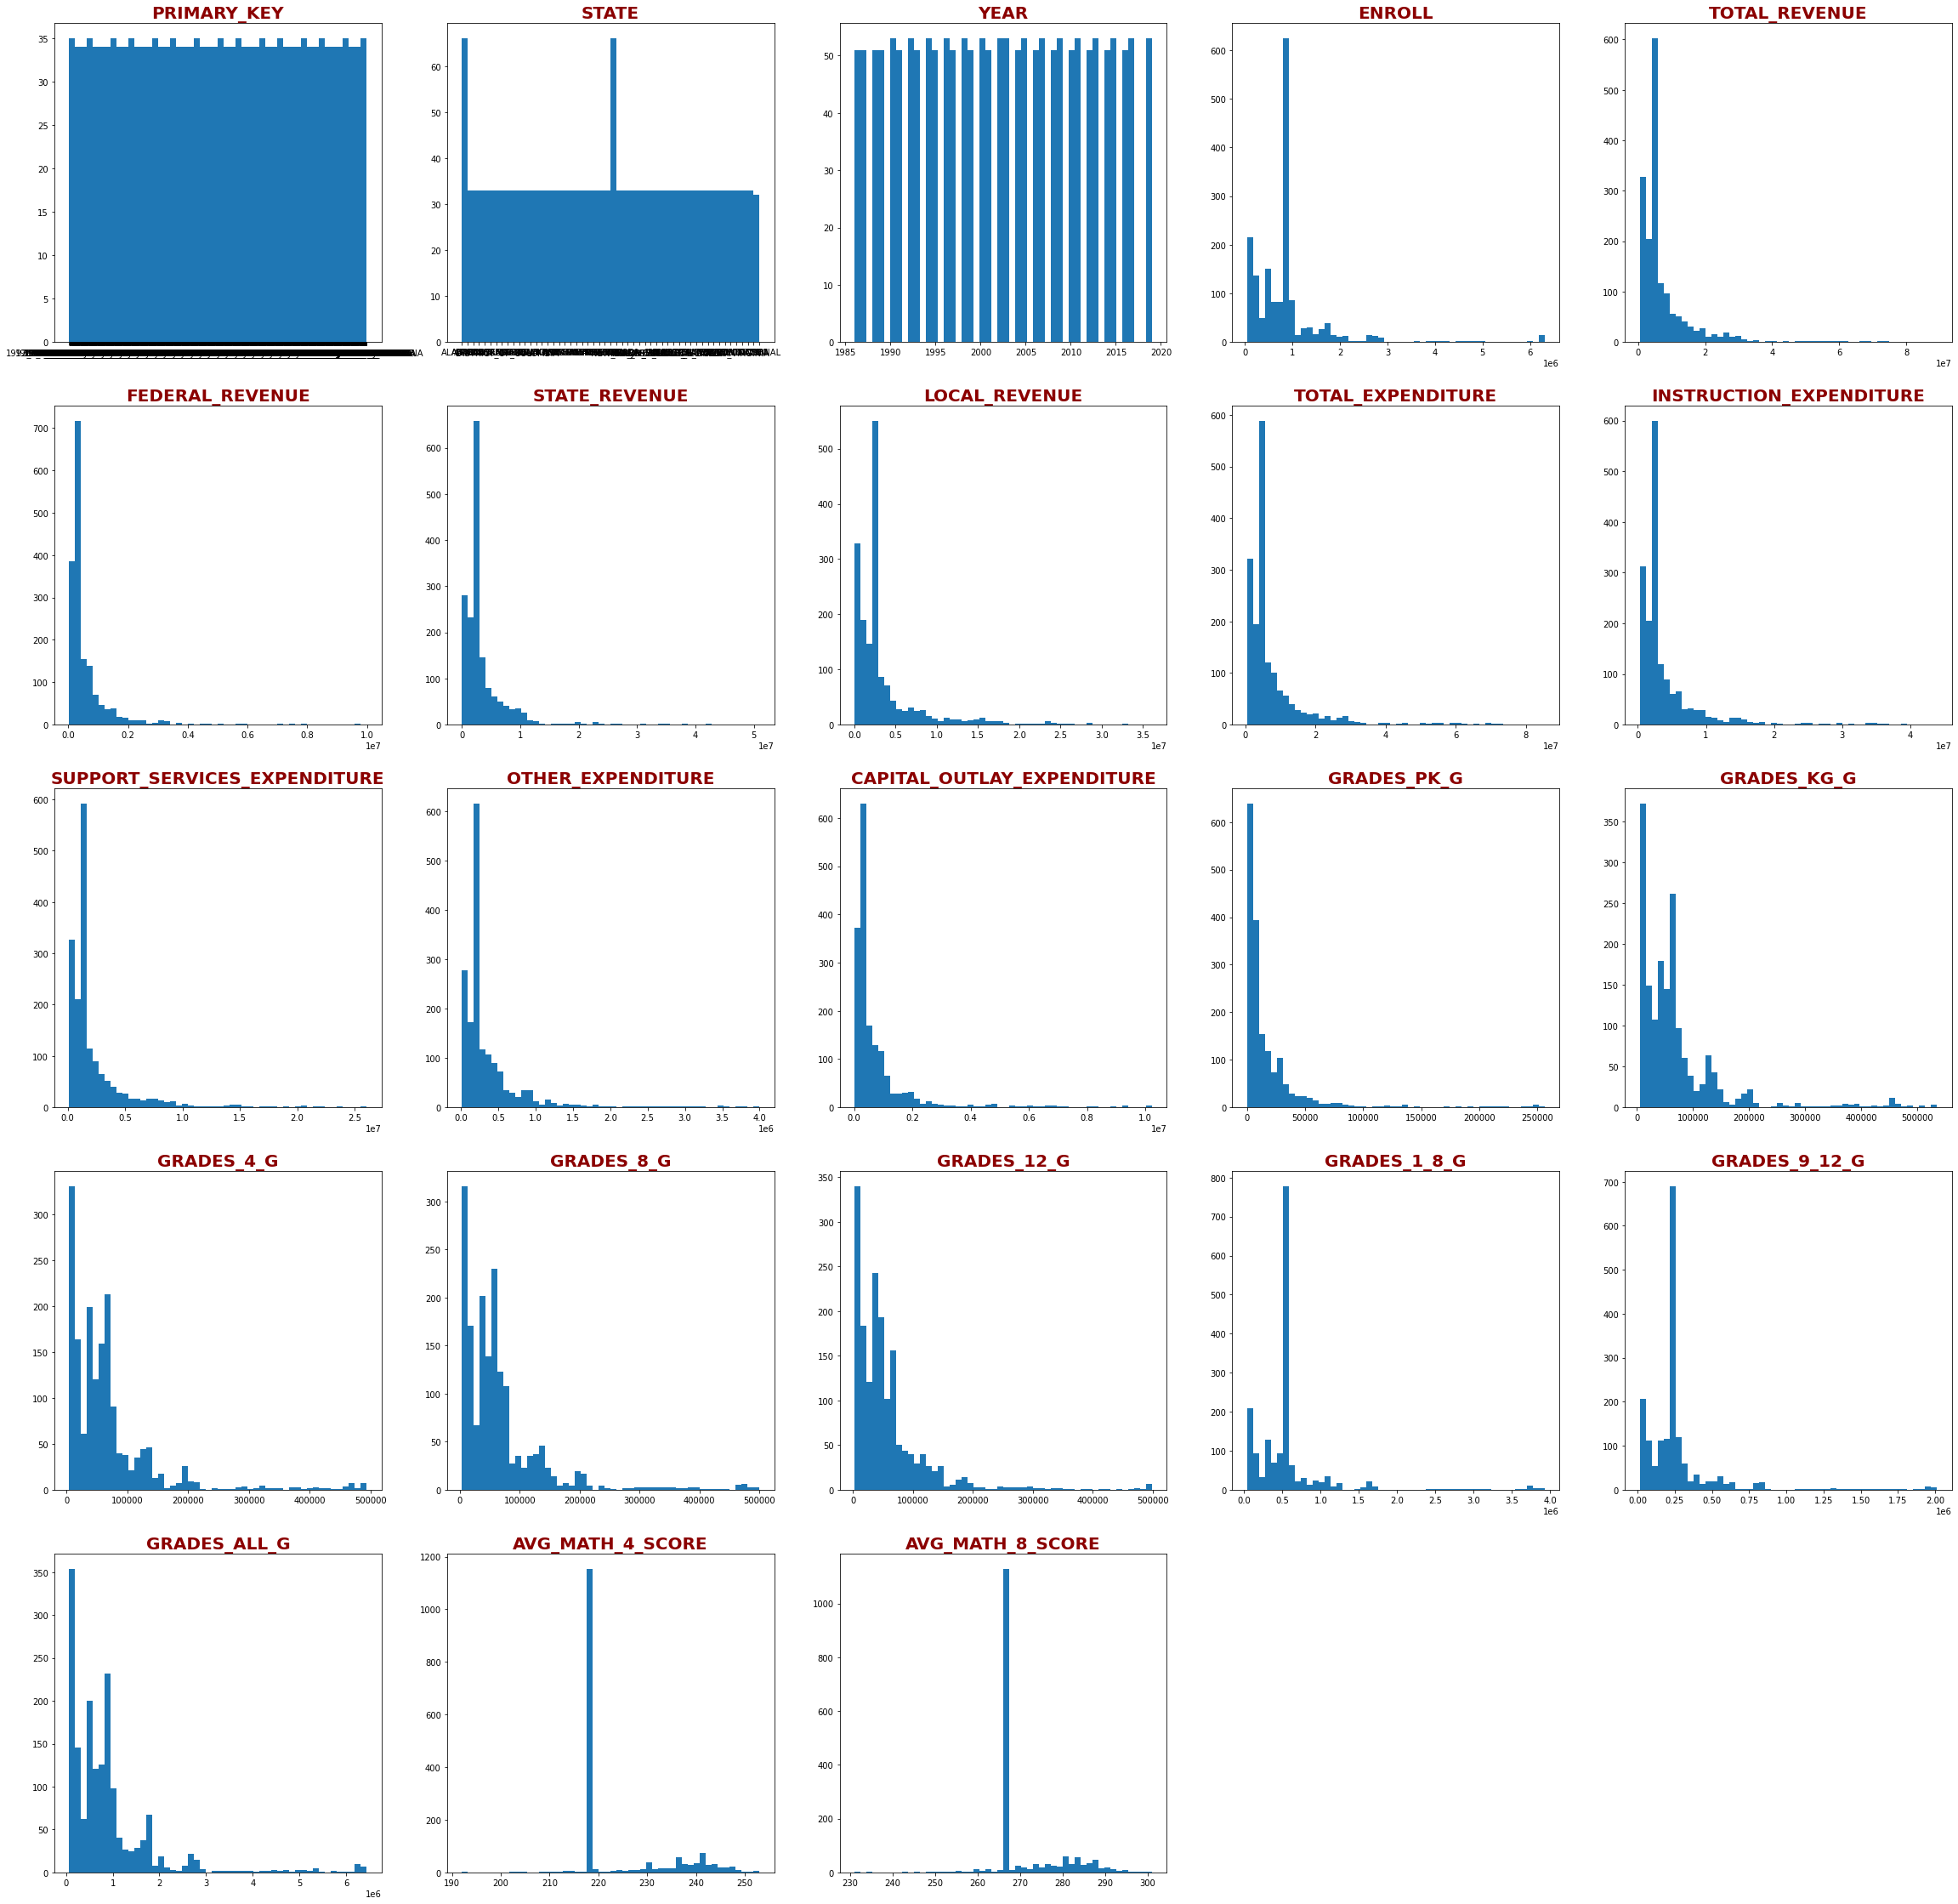

In [ ]:
plt.figure(figsize=(40,40))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 20 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 15 }


for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.hist(df.iloc[:, i],bins=50)
    plt.title(df.columns[i], fontdict=title_font)
    
plt.show()

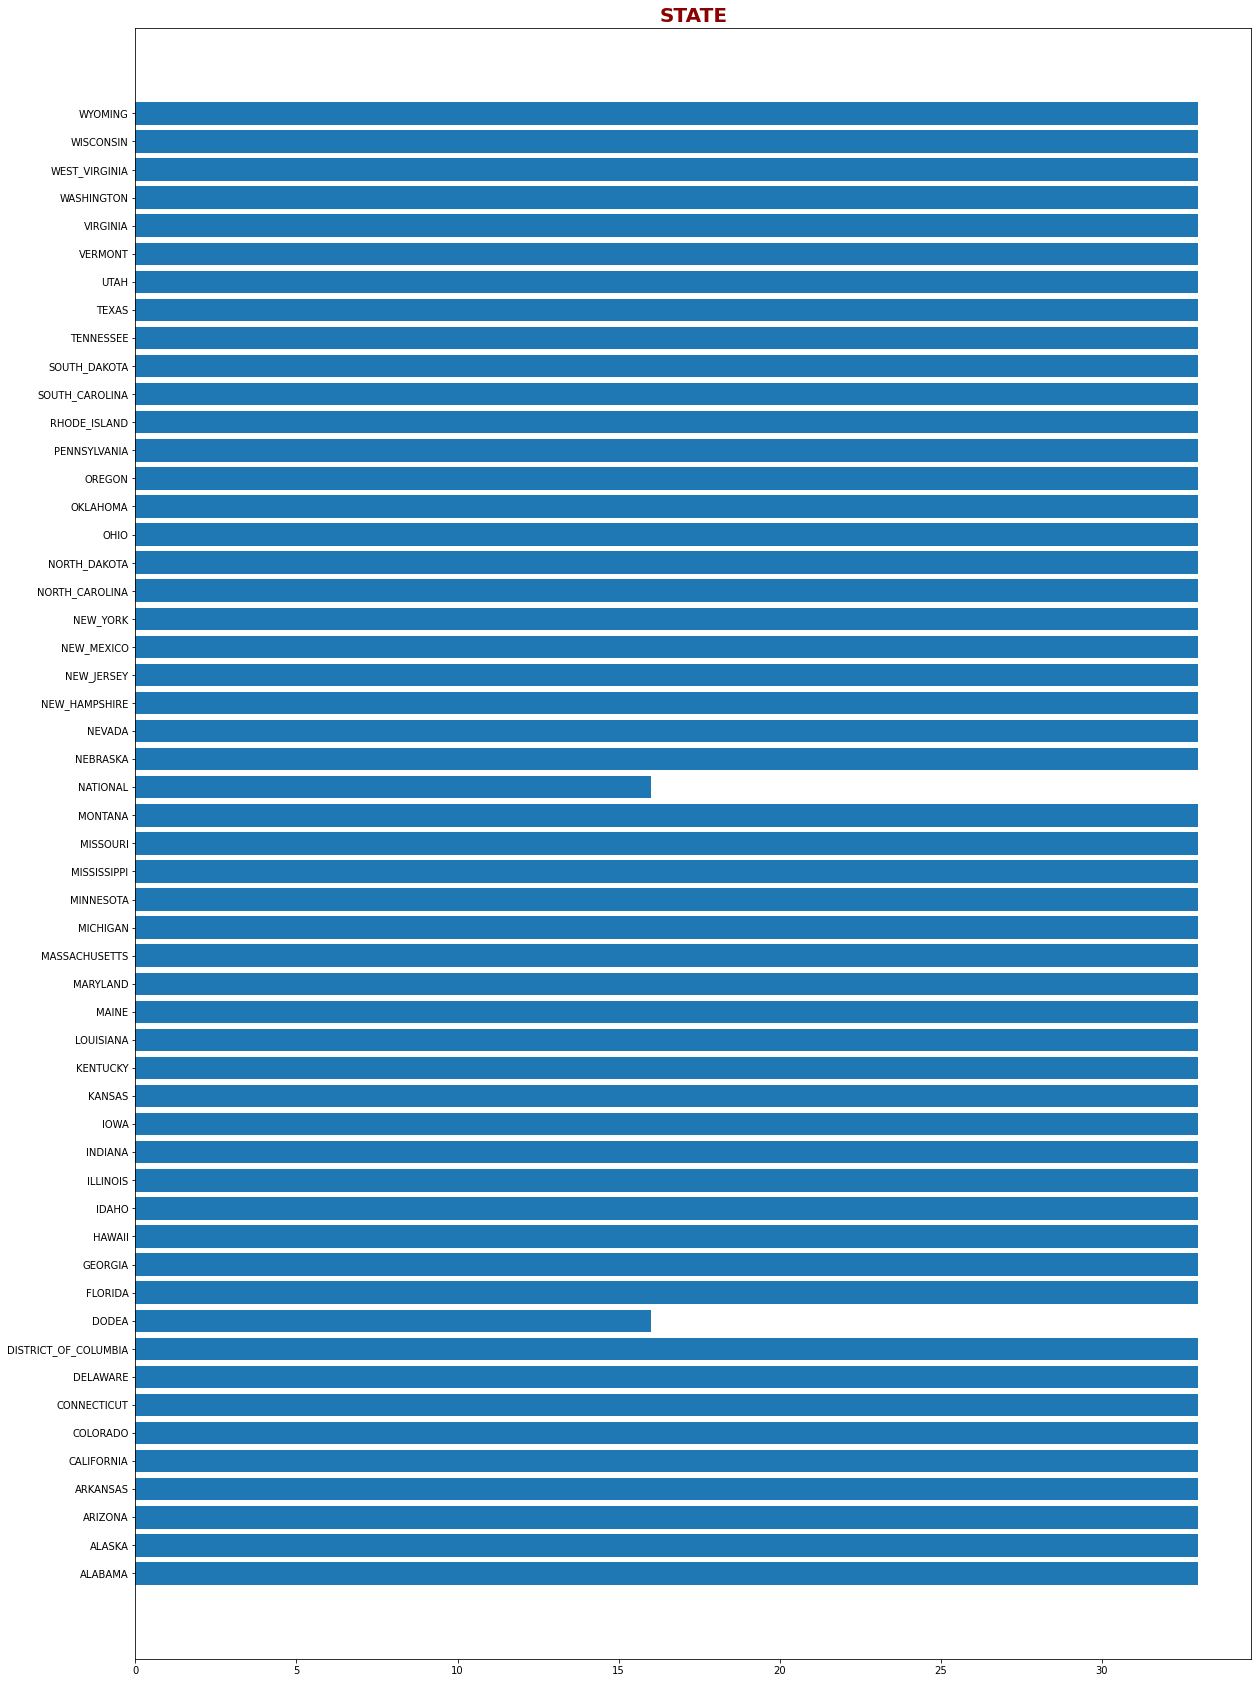

In [ ]:
plt.figure(figsize=(20,30))
plt.barh(df.groupby("STATE")["STATE"].count().index, 
        df.groupby("STATE")["STATE"].count())
plt.title("STATE", fontdict=title_font)

plt.show()

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

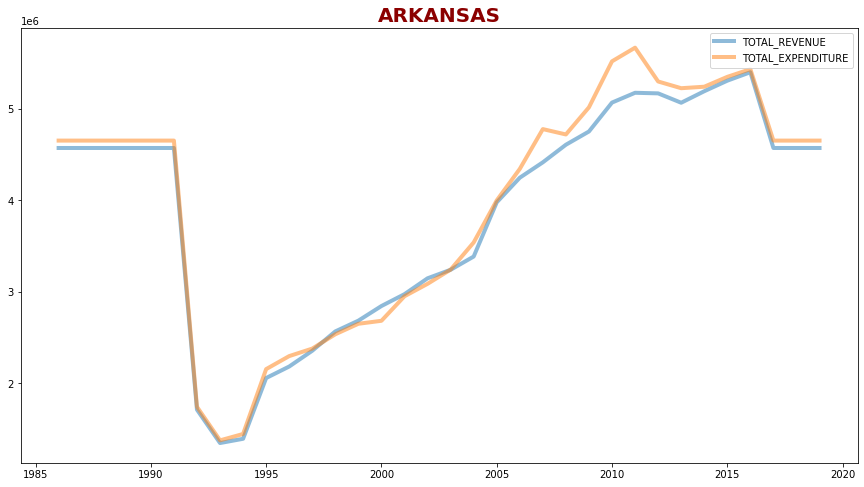

In [ ]:
Arkansas = df[df['STATE'] == 'ARKANSAS'].sort_values(by='YEAR')

plt.figure(figsize=(15, 8))

plt.title('ARKANSAS', fontdict=title_font )
plt.plot(Arkansas['YEAR'], Arkansas['TOTAL_REVENUE'], lw=4, alpha=0.5, label='TOTAL_REVENUE')
plt.plot(Arkansas['YEAR'], Arkansas['TOTAL_EXPENDITURE'], lw=4, alpha=0.5, label='TOTAL_EXPENDITURE')
plt.legend()

plt.show()

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [ ]:
#df[df['STATE']=='ARKANSAS'].info()
Arkansas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1296 to 1665
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   33 non-null     object 
 1   STATE                         33 non-null     object 
 2   YEAR                          33 non-null     int64  
 3   ENROLL                        33 non-null     float64
 4   TOTAL_REVENUE                 33 non-null     float64
 5   FEDERAL_REVENUE               33 non-null     float64
 6   STATE_REVENUE                 33 non-null     float64
 7   LOCAL_REVENUE                 33 non-null     float64
 8   TOTAL_EXPENDITURE             33 non-null     float64
 9   INSTRUCTION_EXPENDITURE       33 non-null     float64
 10  SUPPORT_SERVICES_EXPENDITURE  33 non-null     float64
 11  OTHER_EXPENDITURE             33 non-null     float64
 12  CAPITAL_OUTLAY_EXPENDITURE    33 non-null     float64
 13  GR

In [ ]:
Arkansas[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].sum()

AVG_MATH_4_SCORE       7352.209302
AVG_MATH_8_SCORE       8829.837209
AVG_READING_4_SCORE    7098.441860
AVG_READING_8_SCORE    8567.000000
dtype: float64

In [ ]:
print('TOTAL MATHEMATICS:', (Arkansas['AVG_MATH_4_SCORE'].sum() + Arkansas['AVG_MATH_8_SCORE'].sum()) / 2)
print('TOTAL READING:', (Arkansas['AVG_READING_4_SCORE'].sum() + Arkansas['AVG_READING_8_SCORE'].sum()) / 2)

TOTAL MATHEMATICS: 8091.023255813952
TOTAL READING: 7832.720930232558


**(4)** What is the distribution of mathematics and reading grades?

In [ ]:
import seaborn as sns

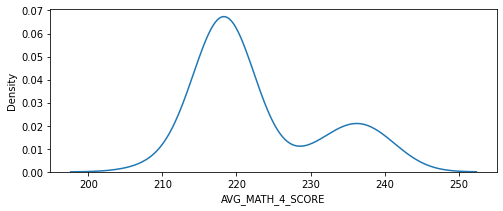

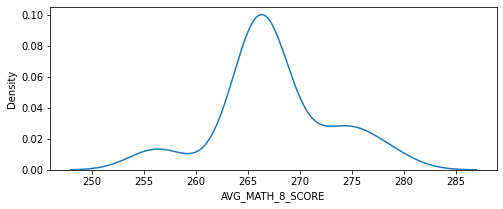

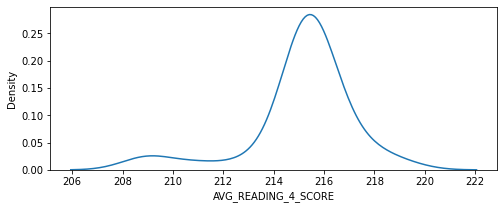

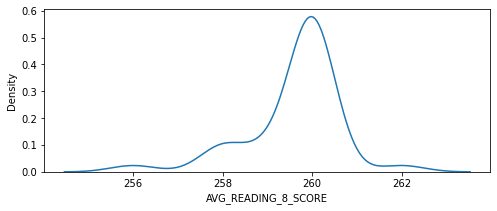

In [ ]:
# distribution
for col in ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE','AVG_READING_8_SCORE']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(Arkansas[col])

**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [ ]:
data = pd.read_csv('states_all.csv')

In [ ]:
Arkansas = data[data['STATE'] == 'ARKANSAS'].sort_values(by='YEAR')
Arkansas.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1296,1986_ARKANSAS,ARKANSAS,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34070.0,32799.0,34053.0,28729.0,NaN,NaN,437438.0,NaN,NaN,NaN,NaN
1297,1987_ARKANSAS,ARKANSAS,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33695.0,32468.0,33810.0,29499.0,NaN,NaN,437036.0,NaN,NaN,NaN,NaN
1298,1988_ARKANSAS,ARKANSAS,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34023.0,33777.0,33461.0,30074.0,NaN,NaN,436387.0,NaN,NaN,NaN,NaN
1299,1989_ARKANSAS,ARKANSAS,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33543.0,34651.0,33353.0,28505.0,NaN,NaN,434960.0,NaN,NaN,NaN,NaN
1300,1990_ARKANSAS,ARKANSAS,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34052.0,34438.0,34384.0,27734.0,NaN,NaN,436286.0,NaN,256.0,NaN,NaN


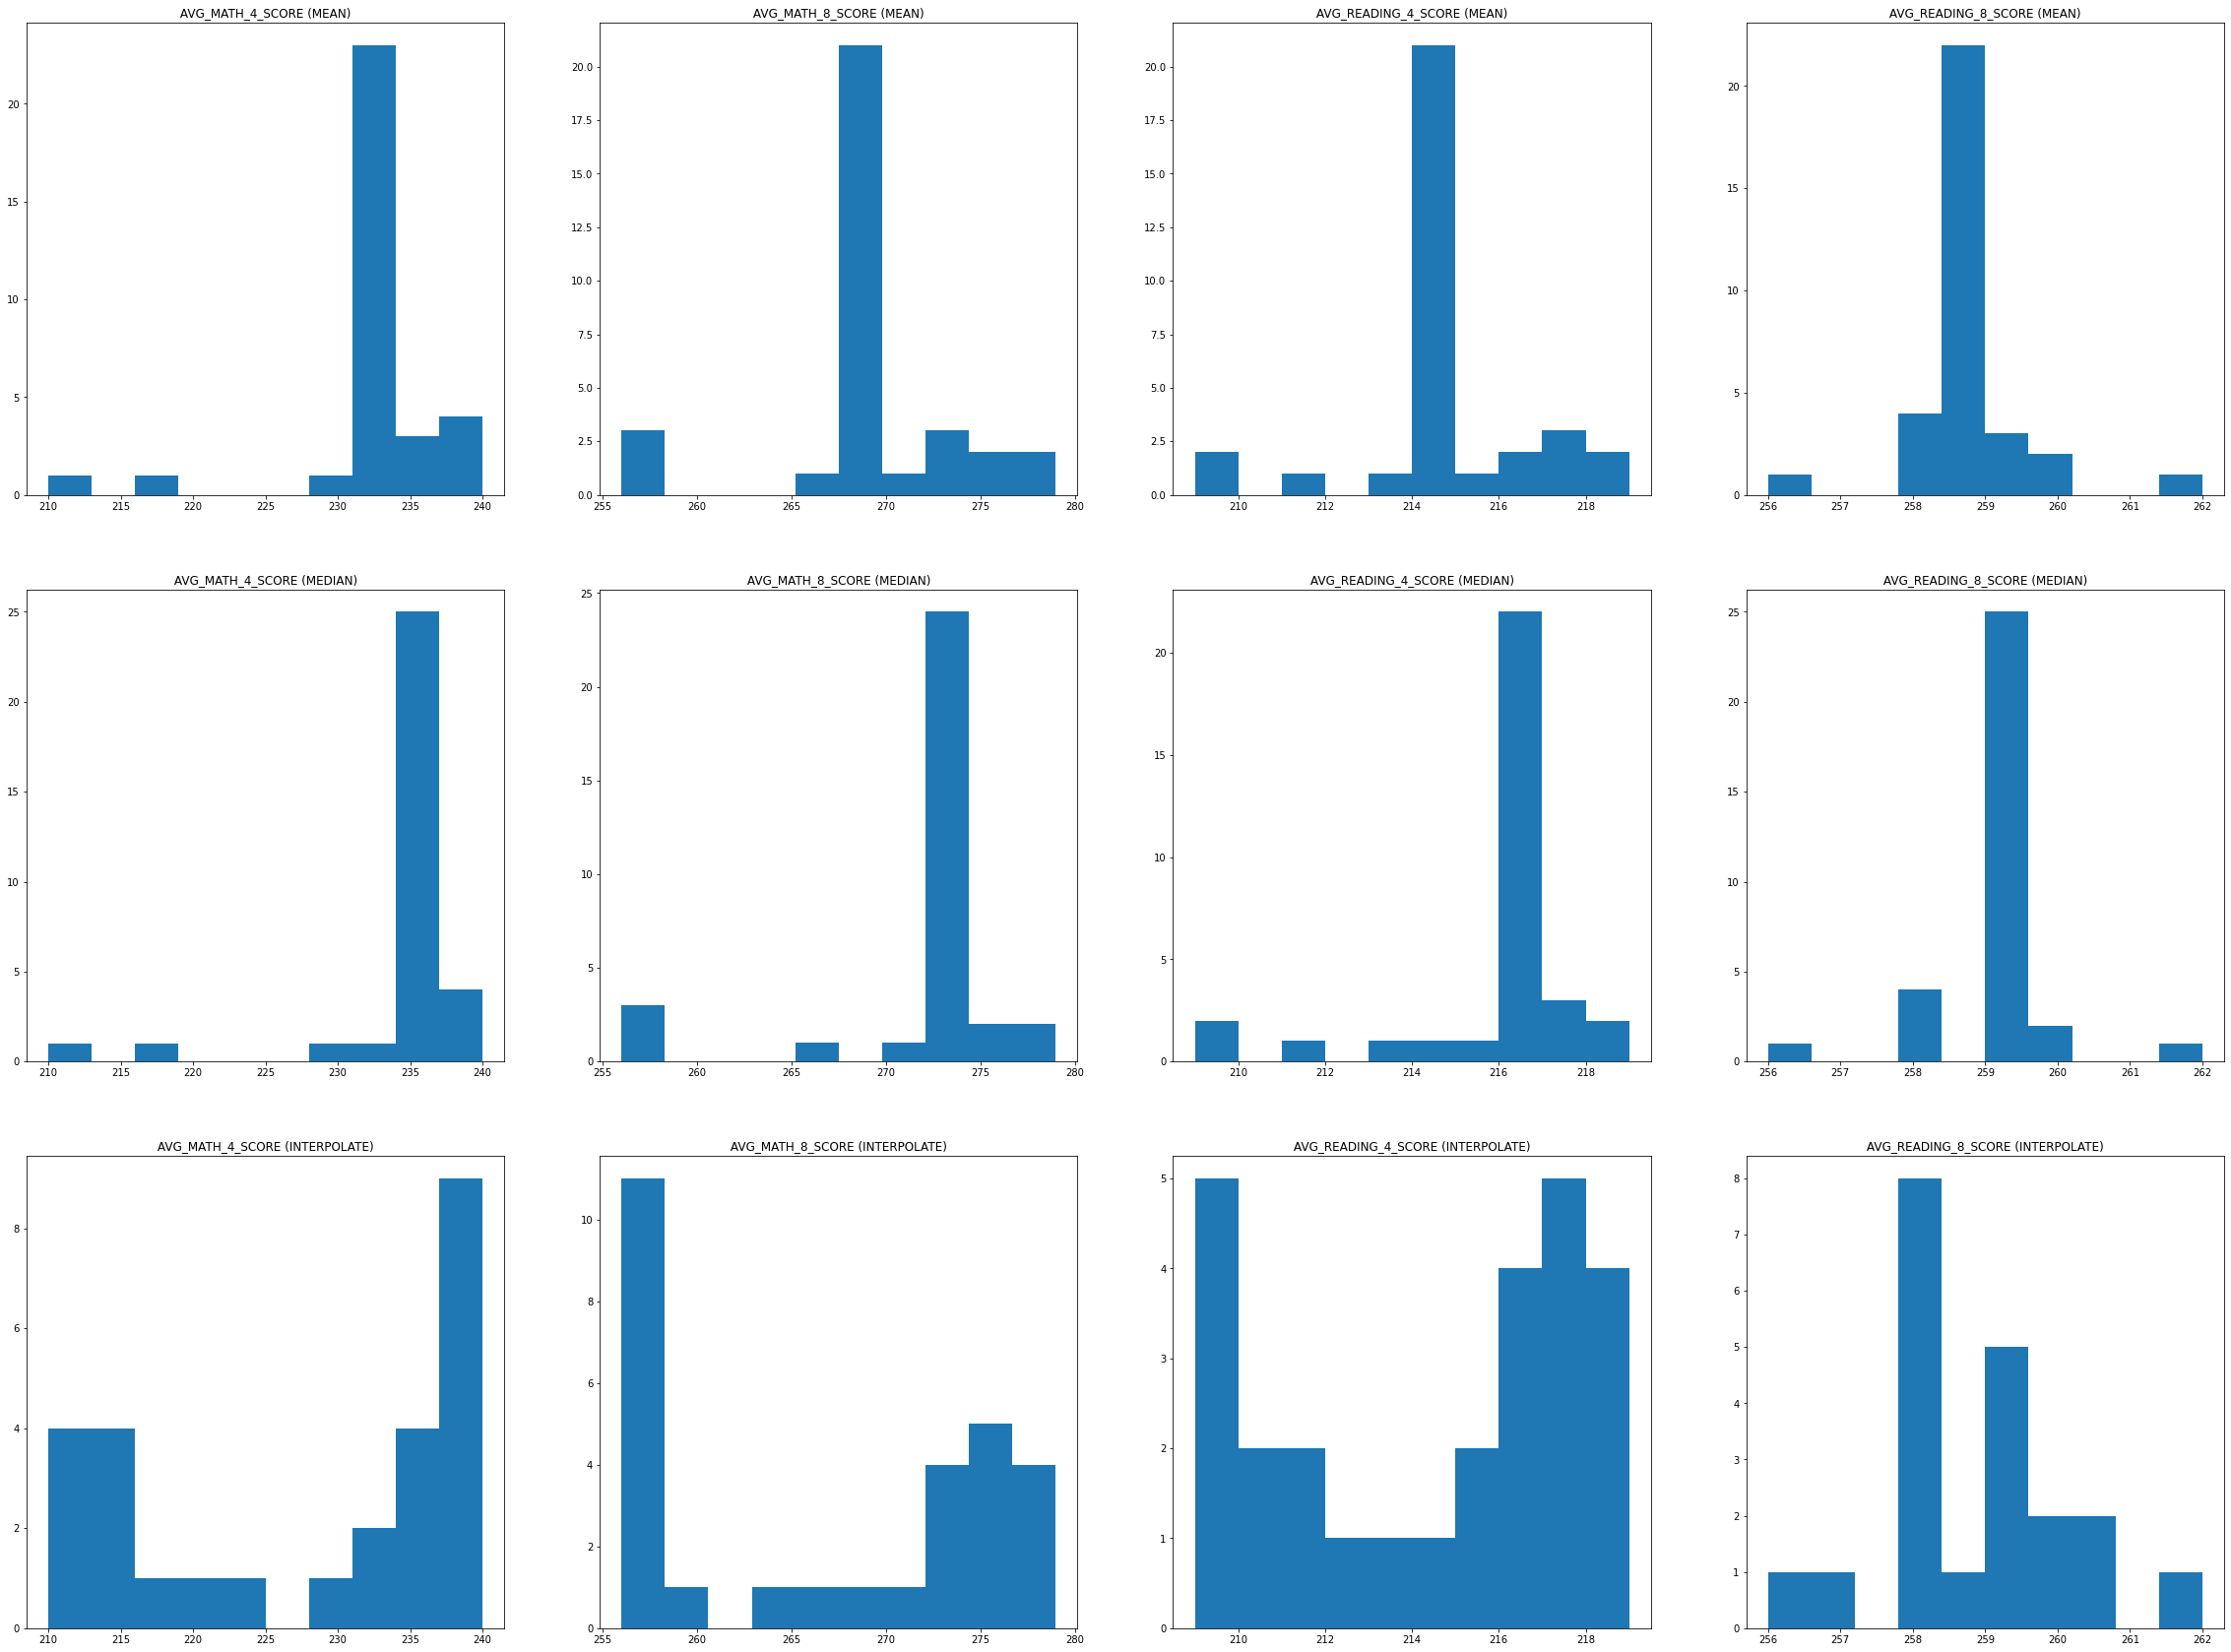

In [ ]:

plt.figure(figsize=(40,30))

variables = [Arkansas['AVG_MATH_4_SCORE'],Arkansas['AVG_MATH_8_SCORE'], Arkansas['AVG_READING_4_SCORE'],Arkansas['AVG_READING_8_SCORE']]
value = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']
for i in range(4):
    plt.subplot(3, 4, i+1)
    plt.hist(variables[i].fillna(variables[i].mean()))
    plt.title(" {} (MEAN) ".format(value[i],fontdict=title_font))
    
for i in range(4):
    plt.subplot(3, 4, i+5)
    plt.hist(variables[i].fillna(variables[i].median()))
    plt.title(" {} (MEDIAN) ".format(value[i],fontdict=title_font))
    
for i in range(4):
    plt.subplot(3, 4, i+9)
    plt.hist(variables[i].interpolate())
    plt.title(" {} (INTERPOLATE) ".format(value[i],fontdict=title_font))

plt.show()